<a href="https://colab.research.google.com/github/tim530712345/20210612_pandas/blob/main/practice7_%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7%E6%95%B0%E6%8D%AE_%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic数据 - 可视化

![](images/7.jpg)

### 导入数据

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
titanic = pd.read_csv('Titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 统计年龄大于20的人数

In [ ]:
titanic['Age'] > 30

PassengerId
1      False
2       True
3      False
4       True
5       True
       ...  
887    False
888    False
889    False
890    False
891     True
Name: Age, Length: 891, dtype: bool

In [ ]:
(titanic['Age'] > 20).sum()

535

### 将PassengerId设置为索引

In [ ]:
titanic=titanic.set_index('PassengerId')
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 绘制一个展示男女乘客比例的扇形图

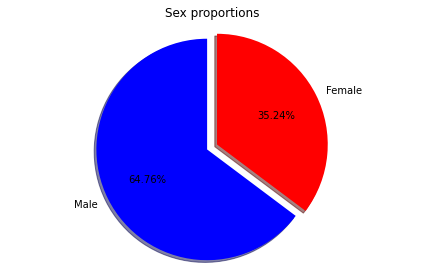

In [ ]:
male = (titanic['Sex'] == 'male').sum()
female = (titanic['Sex'] == 'female').sum()
proportions = [male, female]
plt.pie(proportions, labels=['Male', 'Female'], shadow=True, colors=['blue', 'red'], explode=[0.1, 0], startangle=90, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Sex proportions')
plt.tight_layout()
plt.show()

### 绘制一个展示船票Fare, 与乘客年龄和性别的散点图

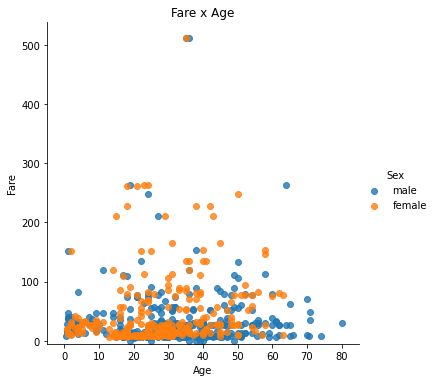

In [ ]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)
lm.set(title = 'Fare x Age')

axes = lm.axes
# 設定負值 讓顯示更清晰
axes[0, 0].set_ylim(-5, )
axes[0, 0].set_xlim(-5, 85)
plt.show()

### 有多少人生还？

In [ ]:
titanic.Survived.sum()

342

### 绘制一个展示船票价格的直方图

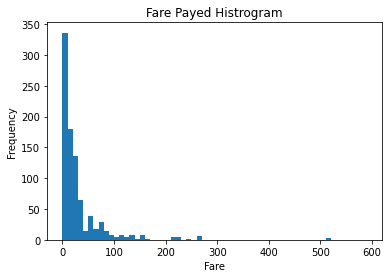

In [ ]:
df = titanic.Fare.sort_values(ascending=False)
binsVal = np.arange(0, 600, 10)
plt.hist(df, bins=binsVal)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()